In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
haberman_ds= pd.read_csv("E:\AppliedAI\haberman.csv")

In [29]:
#Number of points and number of features:
print(haberman_ds.shape)
#  This shows that there are total number of 306 rows(Data points) and 4 cloumns(Features)

(306, 4)


In [30]:
#Features
print(haberman_ds.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [31]:
#Number of classes and data points per class
print(haberman_ds['status'].value_counts())

1    225
2     81
Name: status, dtype: int64


In [32]:
#We can see that we have unbalanced dataset
# There are 225 data points(number of rows) for status=1 and 81 points(number of rows) for status =2

In [33]:
#Setting the status column to catagorical data
haberman_ds['status']=haberman_ds['status'].map({1:'Yes', 2:'No'})


In [34]:
haberman_ds

,age,year,nodes,status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes
5,33,58,10,Yes
6,33,60,0,Yes
7,34,59,0,No
8,34,66,9,No
9,34,58,30,Yes


In [35]:
# Our Objective is to get the understanding of the dataset using EDA and classfication of features

In [46]:
#Will try Pair-plots
# We will have 3C2 combinations as we have 3 features and 2 combinations per feature

C:\Users\kpanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kpanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


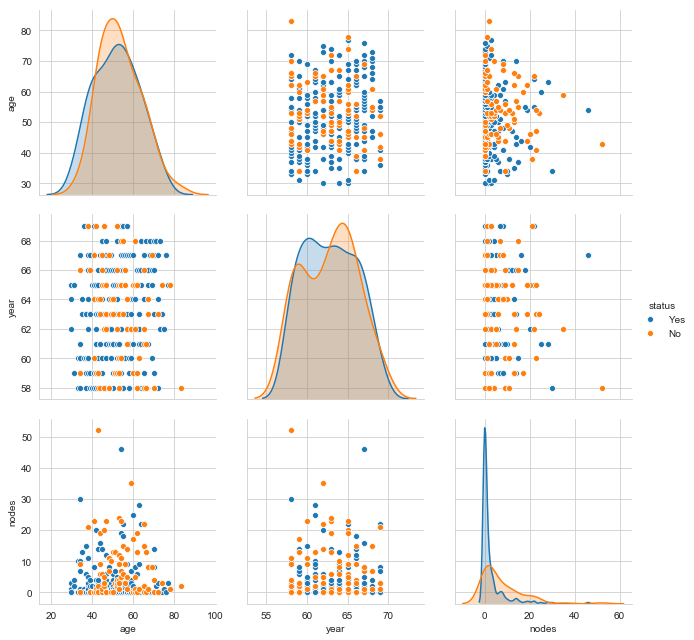

In [47]:
sns.set_style("whitegrid")
sns.pairplot(haberman_ds, hue="status", size=3)
plt.show()

In [ ]:
# Not a very good distributed data points 
# But can see that the data points between year and nodes, have better seperation between the two classes than other plots

C:\Users\kpanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


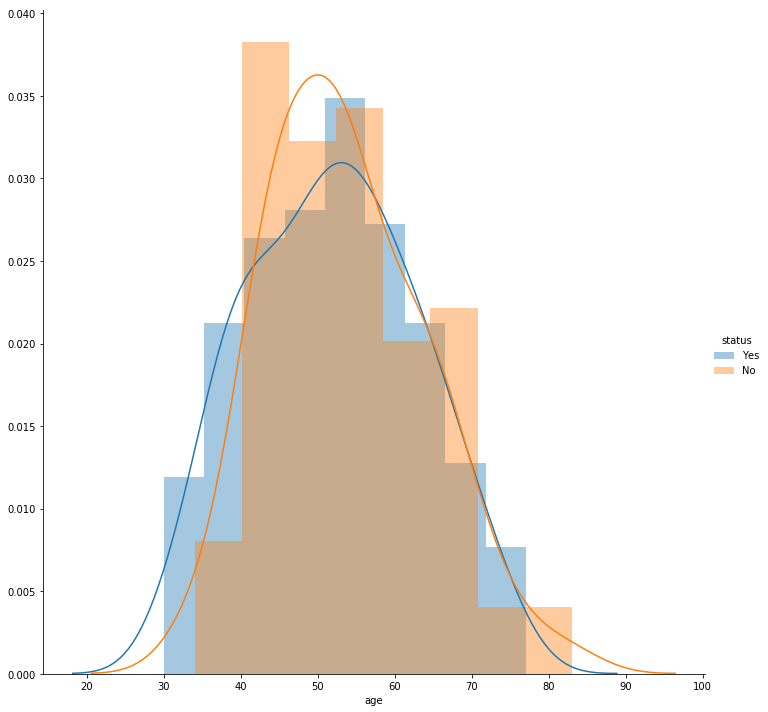

In [40]:
#Doing 1-D plots

sns.FacetGrid(haberman_ds, hue="status", size=10) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

C:\Users\kpanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


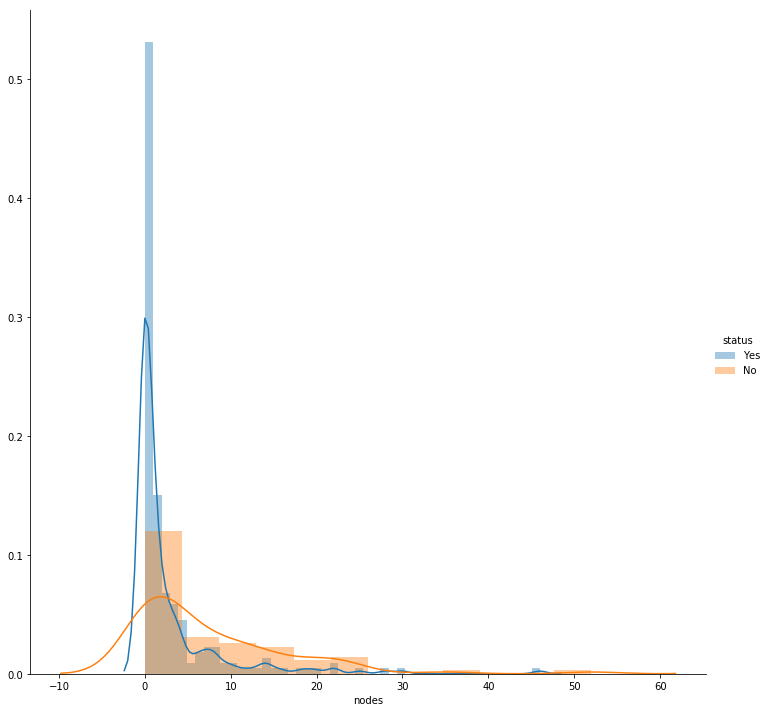

In [44]:
sns.FacetGrid(haberman_ds, hue="status", size=10).map(sns.distplot, "nodes").add_legend()
plt.show()

C:\Users\kpanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


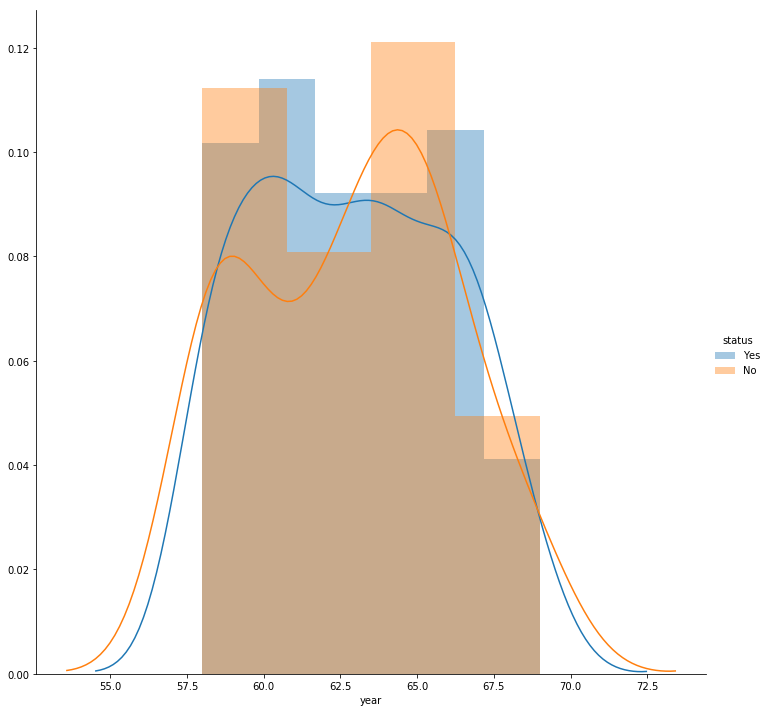

In [45]:
sns.FacetGrid(haberman_ds, hue="status", size= 10).map(sns.distplot, "year").add_legend()
plt.show()

In [ ]:
#Didn't look any significant for analysis

[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[0.20588235 0.29738562 0.38235294 0.45751634 0.55555556 0.65686275
 0.74836601 0.83986928 0.92156863 1.        ]


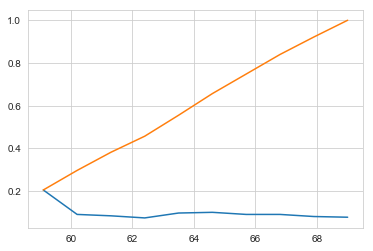

In [73]:
#FINDING PDF and CDF

counts, bin_edges= np.histogram(haberman_ds['year'], bins=10, density=True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)

print(pdf)
print(cdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()


In [ ]:
#Observation: There are 80% of people who have had operation before year 1966

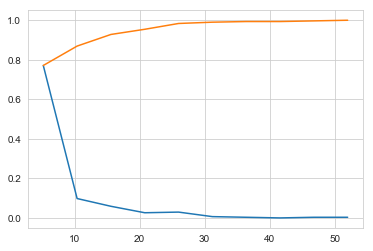

In [75]:
counts, bin_edges= np.histogram(haberman_ds['nodes'], bins=10, density=True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)

plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

In [ ]:
#Observation: There are 100 % of people who have nodes<= 40

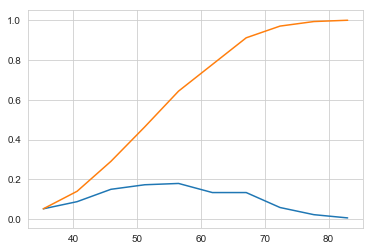

In [78]:
counts, bin_edges = np.histogram(haberman_ds['age'], bins= 10, density=True)
pdf= counts/sum(counts)
cdf= np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

In [ ]:
# Obsevation: there are 70% of people that have age <= 60 years

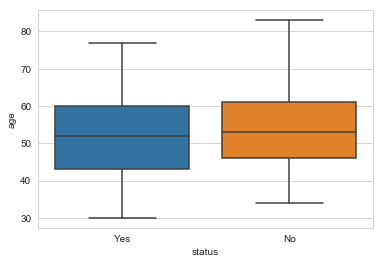

In [79]:
#BOX PLOTS
sns.boxplot(x='status', y='age',data= haberman_ds)
plt.show()


In [ ]:
#Obsevration: from the above box plot, it shows that age is not a big factor of survival of patients

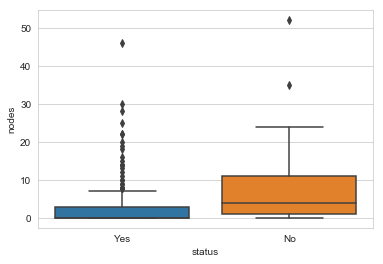

In [80]:
sns.boxplot(x='status', y='nodes', data= haberman_ds)
plt.show()

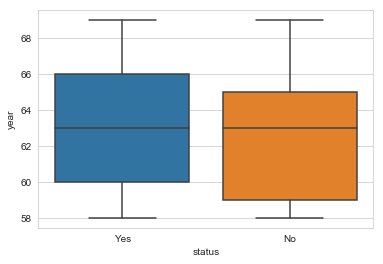

In [81]:
sns.boxplot(x='status', y='year', data = haberman_ds)
plt.show()

In [82]:
#Observation: patients treated before 1960 have lesser chances of surviving

C:\Users\kpanwar\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


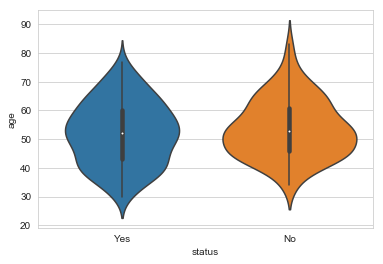

In [83]:
#VOLIN PLOTS
sns.violinplot(x='status', y='age', data= haberman_ds)
plt.show()


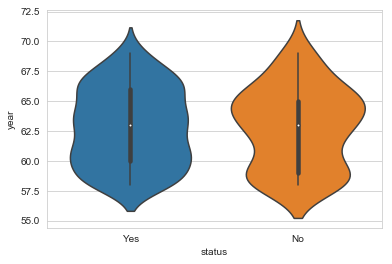

In [85]:
sns.violinplot(x='status', y='year', data= haberman_ds)
plt.show()

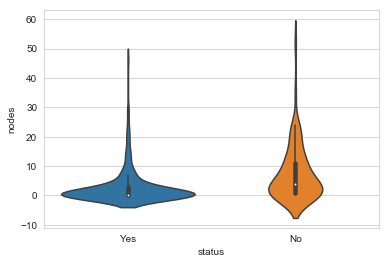

In [86]:
sns.violinplot(x='status', y='nodes', data= haberman_ds)
plt.show()

In [ ]:
#Observation:
1.The number of nodes is higly densed from 0 to 5
2.Almost 80% of the patients who have survived have less than or equal to 5 positive nodes.
